# Overview
This notebook is a step by step to calculate the degrees from semi-circular trajectory data

## Steps
* grab the first point in the trajectory data (960, 707)
* reverse the datapoints
* grab the last point in the trajectory data and loop through every trial
* convert the origin (960, 707) to (0,0) - which will give you an updated coordinate
* using this updated coordinate, transfor it to polar coordinates, which will give you the degree of the data point

--

* count number of data points that fall in the origin
* clean data that is within r of 150
* if there is negative theta, convert it to 0 

--

* load data
* add subject number
* extract relevant columns
* concat data, axis 0
* average degree

## libraries

In [1]:

%matplotlib inline

import pandas as pd
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import loggamma
from scipy.stats import johnsonsu
from scipy.optimize import fmin
from scipy.stats import beta
from scipy.stats import frechet_l
from scipy.special import gamma as gammaf
import warnings
import scipy.stats as st
import statsmodels as sm
import seaborn as sns
import glob

## seaborn style

In [2]:
large = 40; med = 22; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': 30,
          'xtick.labelsize': 14,
          'ytick.labelsize': med,
          #'xtick.direction': ,
          'figure.titlesize': large}
plt.rcParams.update(params)

plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

## function - cartesian to polar coordinates

In [3]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

In [4]:
origin_x = 960
origin_y = 707

# load pain

In [29]:
sublist = [2,3,4,5,6,7,8,9,10] 
main_dir = '/Users/h/Documents/projects_local/social_influence_analysis/dartmouth/beh_raw'

df = pd.DataFrame()
p_result = pd.DataFrame()

fix_file_list = []
for ind,sub in enumerate(sublist):
    files =  glob.glob(os.path.join(main_dir,'sub-{:04d}'.format(sub),'ses-*','*_task*-pain_beh.csv'))
    fix_file_list.append(files)
flat_list = [item for sub_list in fix_file_list for item in sub_list]

for file in flat_list:
    df = pd.read_csv(file)
#     df['src_subject_id'] = sub
    p_result = pd.concat([p_result, df], axis = 0, sort = True)

In [30]:

print(np.unique(p_result['src_subject_id']))


[ 2  3  4  5  6  7  8  9 10]


In [56]:
# # step 3 - subtract mid point (psychtoolbox) ________________________________________________________________________

# #p_result['new_expect_coord_x'] = (p_result['expect_ptb_coord_x'] - origin_x)
# #p_result['new_expect_coord_y'] = (p_result['expect_ptb_coord_y'] - origin_y)
# p_result['new_actual_coord_x'] = (p_result['actual_ptb_coord_x'] - origin_x)
# p_result['new_actual_coord_y'] = (p_result['actual_ptb_coord_y'] - origin_y)

# #p_result['expect_r'], p_result['expect_theta'] = cart2pol(p_result['new_expect_coord_x'], p_result['new_expect_coord_y'])
# p_result['actual_r'], p_result['actual_theta'] = cart2pol(p_result['new_actual_coord_x'], p_result['new_actual_coord_y'])


In [57]:
# # make sure to extract pi, otherwise, the thetas are flipped _____________________________________________________________________
# #p_result['expect_theta_pi'] = p_result['expect_theta']-np.pi
# p_result['actual_theta_pi'] = p_result['actual_theta']-np.pi
# #p_result['expect_theta_degree'] = p_result['expect_theta_pi']*180/np.pi
# p_result['actual_theta_degree'] = p_result['actual_theta_pi']*180/np.pi


In [58]:
# p_result.head()

,ISI01_biopac,ISI01_duration,ISI01_onset,ISI02_biopac,ISI02_duration,ISI02_onset,ISI03_biopac,ISI03_duration,ISI03_onset,ITI_biopac,...,param_task_name,param_trigger_onset,session_id,src_subject_id,new_actual_coord_x,new_actual_coord_y,actual_r,actual_theta,actual_theta_pi,actual_theta_degree
0,1.611769e+09,1.388991,1.611769e+09,1.611769e+09,4.536944,1.611769e+09,1.611769e+09,2.381851,1.611769e+09,1.611769e+09,...,pain,1.611769e+09,1,3,-212,-130,248.684539,-2.591518,-5.733111,-328.483060
1,1.611769e+09,0.778355,1.611769e+09,1.611769e+09,1.059877,1.611769e+09,1.611769e+09,4.189426,1.611769e+09,1.611769e+09,...,pain,1.611769e+09,1,3,-94,-218,237.402612,-1.977900,-5.119493,-293.325351
2,1.611769e+09,1.085627,1.611769e+09,1.611769e+09,2.567039,1.611769e+09,1.611769e+09,2.596023,1.611769e+09,1.611769e+09,...,pain,1.611769e+09,1,3,-234,-88,250.000000,-2.781886,-5.923478,-339.390307
3,1.611769e+09,2.092753,1.611769e+09,1.611769e+09,9.373788,1.611769e+09,1.611770e+09,2.283539,1.611770e+09,1.611769e+09,...,pain,1.611769e+09,1,3,-97,-225,245.018367,-1.977832,-5.119424,-293.321411
4,1.611770e+09,1.380569,1.611770e+09,1.611770e+09,1.361862,1.611770e+09,1.611770e+09,2.291296,1.611770e+09,1.611770e+09,...,pain,1.611769e+09,1,3,-248,-13,248.340492,-3.089221,-6.230814,-356.999339


In [59]:
# np.histogram(p_result['actual_r'])

(array([ 2,  0,  0,  0,  0,  0,  4,  4, 20, 18]),
 array([237.40261161, 238.66235045, 239.92208929, 241.18182813,
        242.44156697, 243.70130581, 244.96104464, 246.22078348,
        247.48052232, 248.74026116, 250.        ]))

## filter actual rating

In [60]:
p_actual_filter = p_result.loc[(p_result['actual_r']>=150) & (p_result['event04_actual_responseonset'] != "NA") ]


## actual rating - cue

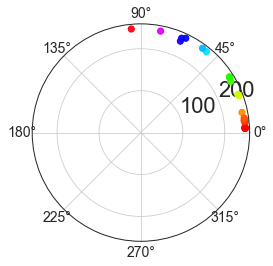

In [61]:
# Compute areas and colors
p_result = p_actual_filter
colors = p_result['actual_theta_pi']

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(p_result['actual_theta_pi'], p_result['actual_r'], c=colors, cmap='hsv', alpha=0.75)


### plot raw form

In [58]:


# area = 200 * result['expect_newr']**2
p_result['newr'] = np.ones(p_result.actual_r.shape)
area = 200 * p_result['newr']**2
groups = p_result.groupby('src_subject_id','param_stimulus_type')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)

for name, group in groups:
    ax.scatter(group.actual_theta_pi, group.actual_r,label=name, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
ax.legend()

figure_title = "Thermode ratings\n on a semi-circular scale"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)

AttributeError: 'DataFrame' object has no attribute 'actual_r'

### plot by rotation degrees

Text(0.5, 0.8, 'Pain task\n rating on semi-circular scale per degree')

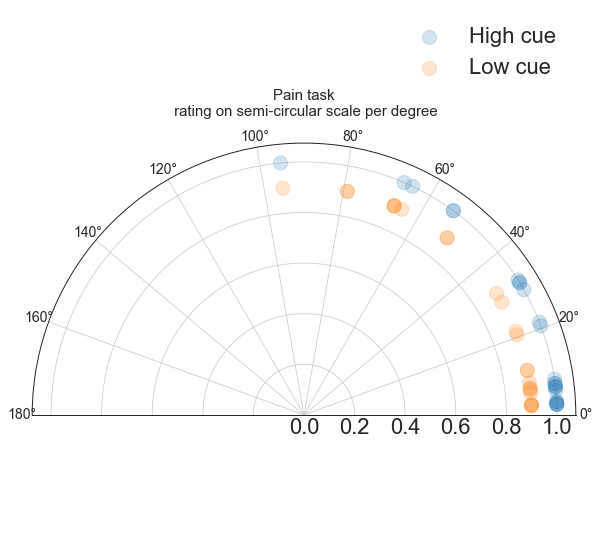

In [63]:
# Compute areas and colors

colors = p_result['actual_theta_pi']
p_result['newr'] = np.ones(p_result.actual_r.shape)

area = 200 * p_result['newr']**2


ca_group_low = p_result.loc[p_result['param_cue_type'] =='low_cue']
ca_group_high = p_result.loc[(p_result['param_cue_type']== 'high_cue')] #| (p_result['param_cue_type']== 10)]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)
p100 = ax.scatter(ca_group_high.actual_theta_pi, np.ones(ca_group_high.actual_r.shape),label='High cue', alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p50 = ax.scatter(ca_group_low.actual_theta_pi, np.ones(ca_group_low.actual_r.shape)*0.9,label='Low cue', alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
figure_title = "Pain task\n rating on semi-circular scale per degree"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)

### participant mean

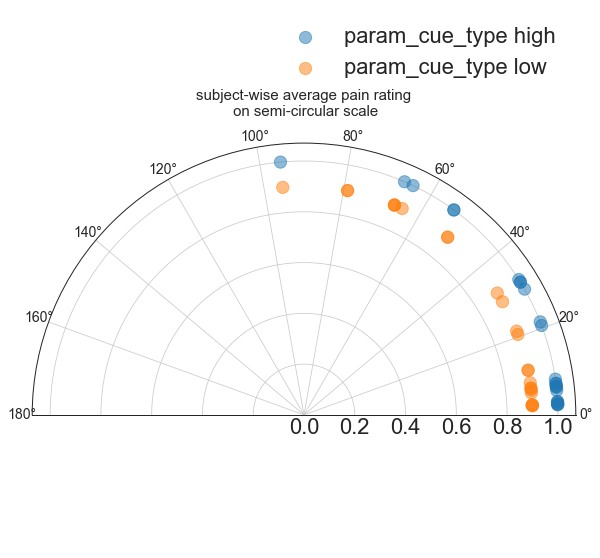

In [64]:
c_group_mean = p_result.groupby(['param_cue_type','src_subject_id']).mean().reset_index()
colors = c_group_mean['actual_theta_pi']
c_group_mean['newr'] = np.ones(c_group_mean.actual_r.shape)
area = 150 * c_group_mean['newr']**2

c_group_mean_low = p_result.loc[p_result['param_cue_type'] =='low_cue']
c_group_mean_high = p_result.loc[(p_result['param_cue_type']== 'high_cue')] 
fig = plt.figure(figsize=(10, 10));ax = fig.add_subplot(projection='polar');ax.set_thetamin(0);ax.set_thetamax(180)
figure_title = "subject-wise average pain rating\n on semi-circular scale"
plt.text(0.5,0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)

chigh = ax.scatter(c_group_mean_high.actual_theta_pi, np.ones(c_group_mean_high.newr.shape),label='param_cue_type high', alpha=0.50, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
clow = ax.scatter(c_group_mean_low.actual_theta_pi, np.ones(c_group_mean_low.newr.shape)*0.9,label='param_cue_type low', alpha=0.50, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 

# p150 = ax.scatter(group_mean_150.theta, np.ones(group_mean_150.newr.shape)*1.1,label=150, alpha=0.60, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
ax.legend()

## actual rating - temperature

### raw form

Text(0.5, 0.8, 'Cognitive task\n rating on semi-circular scale')

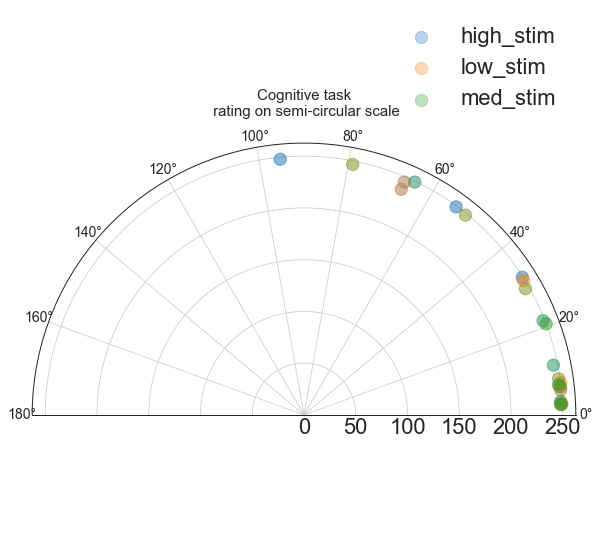

In [65]:
groups = p_result.groupby('param_stimulus_type')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)

for name, group in groups:
    ax.scatter(group.actual_theta_pi, group.actual_r,label=name, alpha=0.30, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
ax.legend()

figure_title = "Cognitive task\n rating on semi-circular scale"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)

### rotation degrees - ignore r

In [59]:
# Compute areas and colors
colors = p_result['actual_theta_pi']
p_result['newr'] = np.ones(p_result.actual_r.shape)

area = 200 * p_result['newr']**2

# groups = c_result.groupby('administer')
group45 = p_result[p_result['param_stimulus_type'] =='low_stim']
group46 = p_result[p_result['param_stimulus_type'] =='med_stim']
group47 = p_result[p_result['param_stimulus_type'] =='high_stim']


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)
p45 = ax.scatter(group45.actual_theta_pi, np.ones(group45.actual_r.shape)*1.0,label=48, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p46 = ax.scatter(group46.actual_theta_pi, np.ones(group46.actual_r.shape)*1.1,label=49, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p47 = ax.scatter(group47.actual_theta_pi, np.ones(group47.actual_r.shape)*1.2,label=50, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
# p48 = ax.scatter(group48.actual_theta_pi, np.ones(group48.actual_r.shape)*1.3,label=48, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
# p49 = ax.scatter(group49.actual_theta_pi, np.ones(group49.actual_r.shape)*1.4,label=49, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
# p50 = ax.scatter(group50.actual_theta_pi, np.ones(group50.actual_r.shape)*1.5,label=50, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
figure_title = "all subject's rating on semi-circular scale per celcius"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)

KeyError: 'actual_theta_pi'

### subject-wise mean

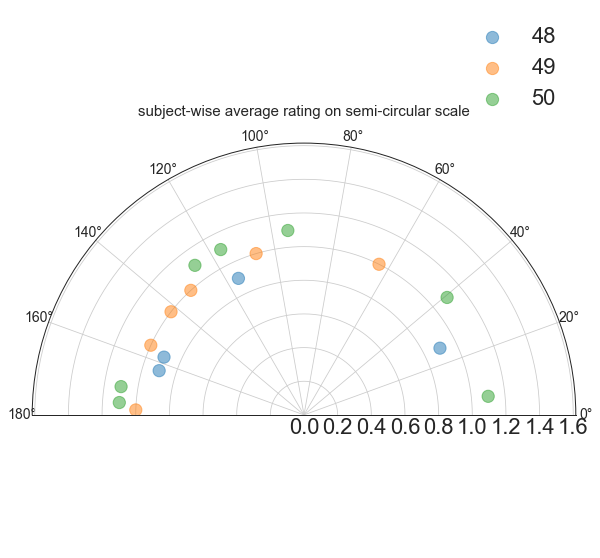

In [60]:
p_group_mean = p_result.groupby(['param_stimulus_type','src_subject_id']).mean().reset_index()
colors = p_group_mean['event04_actual_angle']
p_group_mean['newr'] = 1
# area = 200 * p_result['newr']**2
area = 150 * p_group_mean['newr']**2


# actual_group_mean_50 = c_group_mean[c_group_mean['p5_administer_type'] ==50]
# actual_group_mean_100 = c_group_mean[c_group_mean['p5_administer_type'] ==100]
# actual_group_mean_150 = c_group_mean[c_group_mean['p5_administer_type'] ==150]


group_mean_48 = p_group_mean[p_group_mean['param_stimulus_type'] =='low_stim']
group_mean_49 = p_group_mean[p_group_mean['param_stimulus_type'] =='med_stim']
group_mean_50 = p_group_mean[p_group_mean['param_stimulus_type'] =='high_stim']


fig = plt.figure(figsize=(10, 10));ax = fig.add_subplot(projection='polar');
ax.set_thetamin(0);ax.set_thetamax(180)

figure_title = "subject-wise average rating on semi-circular scale"
plt.text(0.5,0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)

mp45 = ax.scatter(group_mean_48.event04_actual_angle, np.ones(group_mean_48.newr.shape)*0.9,label=48, alpha=0.50, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
mp46 = ax.scatter(group_mean_49.event04_actual_angle, np.ones(group_mean_49.newr.shape)*1.0,label=49, alpha=0.50, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
mp47 = ax.scatter(group_mean_50.event04_actual_angle, np.ones(group_mean_50.newr.shape)*1.1,label=50, alpha=0.50, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
# mp48 = ax.scatter(group_mean_48.actual_theta_pi, np.ones(group_mean_48.newr.shape)*1.2,label=50, alpha=0.50, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
# mp49 = ax.scatter(group_mean_49.actual_theta_pi, np.ones(group_mean_49.newr.shape)*1.3,label=50, alpha=0.50, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
# mp50 = ax.scatter(group_mean_50.actual_theta_pi, np.ones(group_mean_50.newr.shape)*1.4,label=50, alpha=0.50, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 

ax.legend()

## split subgroup

In [71]:
grouped = p_result.groupby('plateau')
rowlength = grouped.ngroups/2                         # fix up if odd number of groups
fig, axs = plt.subplots(2, 1, subplot_kw=dict(projection='polar'))
axs.set_thetamin(0);axs.set_thetamax(180)
# plt.subplots(figsize=(9,4), 
#                         nrows=1, ncols=rowlength, subplot_kw=dict(polar=True))    # fix as above
#                         #gridspec_kw=dict(hspace=0.4),
#                          # Much control of gridspec

# c_group_mean = c_result.groupby(['temperature','src_subject_id']).mean().reset_index()
targets = zip(grouped.groups.keys(), axs.flatten())


SyntaxError: positional argument follows keyword argument (<ipython-input-71-91472ece9286>, line 3)

# merge Plataues (if 5 for longer plateaus)

In [11]:
p_result['merge_plateau'] = p_result['plateau']
p_result['merge_plateau'] = p_result['merge_plateau'].replace([5],10)

https://stackoverflow.com/questions/43875258/how-to-change-the-positions-of-subplot-titles-and-axis-labels-in-seaborn-facetgr

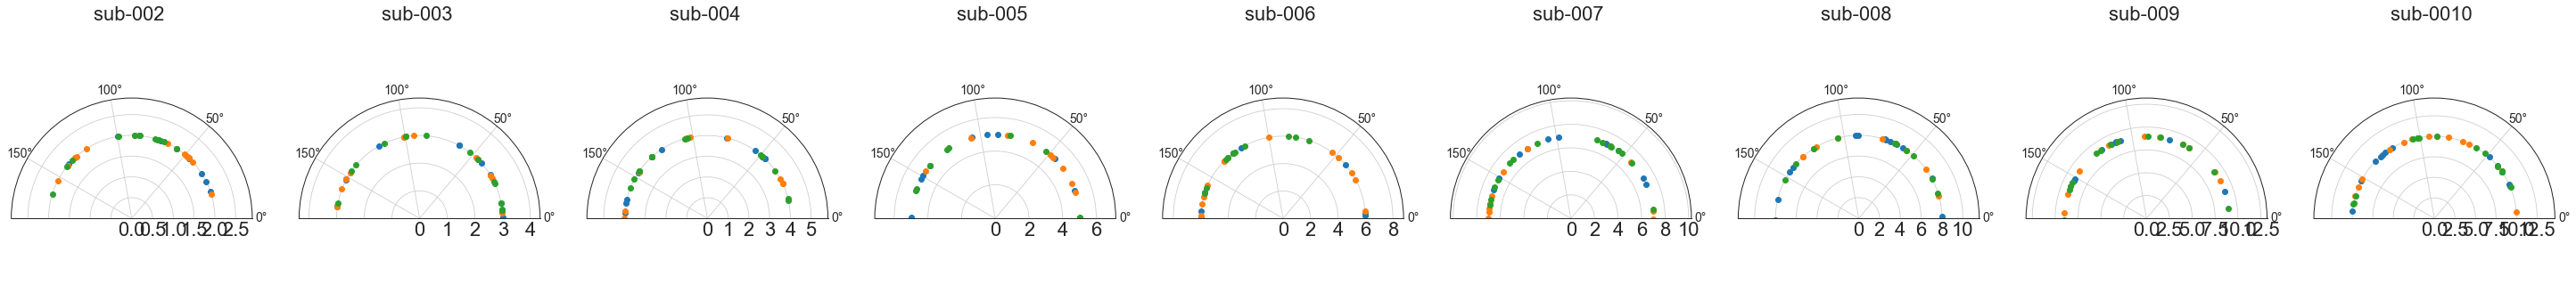

In [43]:
#df = pd.melt(p_result, id_vars=['plateau', 'temperature'], var_name='actual_theta_pi', value_name='actual_theta_pi')
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.set_thetamin(0);ax.set_thetamax(180)

    #ax.text(.1, .6, f"N = {n}", transform=ax.transAxes)

g = sns.FacetGrid(p_result, col="src_subject_id",  hue="param_stimulus_type",
                  subplot_kws=dict(projection='polar'), size=4.5, #col_wrap=5,
                  sharex=False, sharey=False, despine=False, margin_titles=True)

# Draw a scatterplot onto each axes in the grid
g.map(plt.scatter, "event04_actual_angle", "src_subject_id")
# g.map.set_thetamin(0);g.map.set_thetamax(180)
g.map_dataframe(sns.scatterplot, x="event04_actual_angle", y="src_subject_id")
# g.set_axis_labels("theta", "Tip")
g.set_axis_labels("Total bill", "Tip")
g.map_dataframe(annotate)
g.set_titles(col_template="sub-00{col_name} ", row_template="{row_name}")
#g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
# plt.savefig('./image.png')

plt.show()


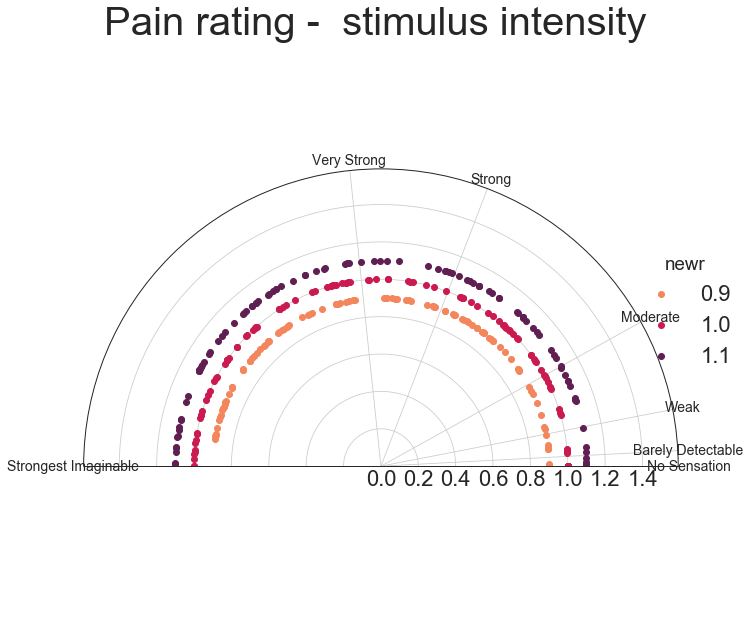

In [54]:
#df = pd.melt(p_result, id_vars=['plateau', 'temperature'], var_name='actual_theta_pi', value_name='actual_theta_pi')
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.set_thetamin(0);ax.set_thetamax(180)
    my_list = [ 0, 3,  11, 29,69, 96, 180]
    my_new_list = [i * np.pi/180 for i in my_list]
    ax.set_xticks(my_new_list)

    ax.set_xticklabels(['No Sensation', 
                        'Barely Detectable', 'Weak', 
                        'Moderate', 'Strong', 'Very Strong', 
                        'Strongest Imaginable'], Fontsize = 14)

    
# ---
p_group_mean = p_result.groupby(['param_stimulus_type','src_subject_id']).mean().reset_index()
p_group_mean = p_result.groupby(['param_stimulus_type','src_subject_id']).mean().reset_index()
colors = p_group_mean['event04_actual_angle']
p_group_mean['newr'] = 1
# area = 200 * p_result['newr']**2
area = 150 * p_group_mean['newr']**2


# actual_group_mean_50 = c_group_mean[c_group_mean['p5_administer_type'] ==50]
# actual_group_mean_100 = c_group_mean[c_group_mean['p5_administer_type'] ==100]
# actual_group_mean_150 = c_group_mean[c_group_mean['p5_administer_type'] ==150]


group_mean_48 = p_group_mean[p_group_mean['param_stimulus_type'] =='low_stim']
group_mean_49 = p_group_mean[p_group_mean['param_stimulus_type'] =='med_stim']
group_mean_50 = p_group_mean[p_group_mean['param_stimulus_type'] =='high_stim']

# ---

p_result['newr'] = 1 #np.ones(p_result.actual_r.shape)
area = 200 * p_result['newr']**2    
p_result['newr'] = p_result.param_stimulus_type.replace({"low_stim": 0.9, "med_stim": 1, "high_stim":1.1})
orders = [48,49,50]
    
g = sns.FacetGrid(p_result,  hue="newr", palette = "rocket_r", #hue_kws=d,          
                  subplot_kws=dict(projection='polar'), size=9,  legend_out=True, #col_wrap=5,
                  sharex=False, sharey=False, despine=False) #, margin_titles=True)
g.map(plt.scatter, "event04_actual_angle", "newr")
g.map_dataframe(annotate)
#g.set_titles(row_template="{row_name}")
g.add_legend()
g.fig.suptitle('Pain rating -  stimulus intensity')
g.fig.tight_layout()
plt.show()


# thermode size x head

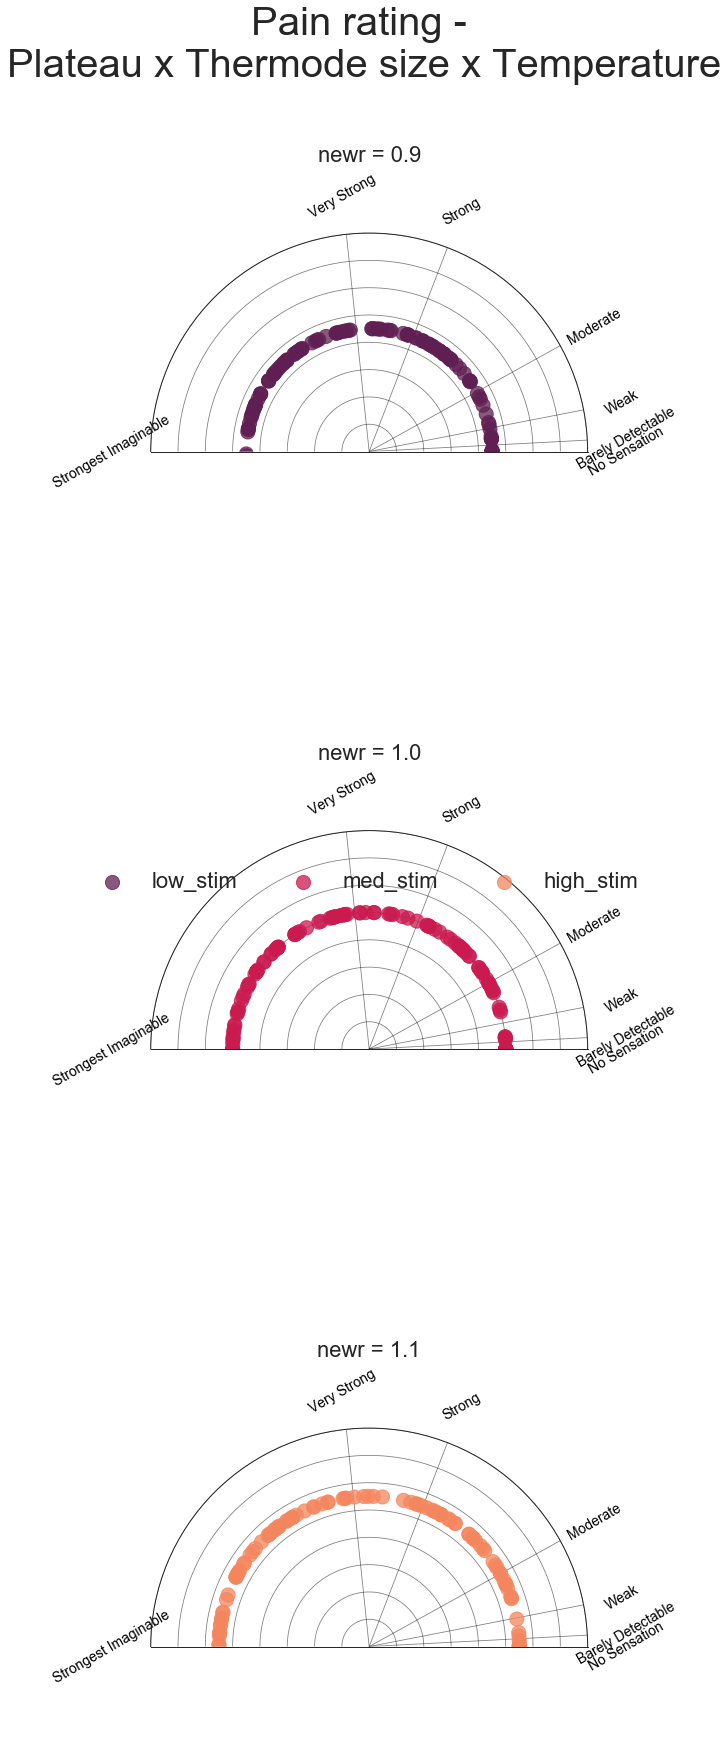

In [57]:
#df = pd.melt(p_result, id_vars=['plateau', 'temperature'], var_name='actual_theta_pi', value_name='actual_theta_pi')
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.set(xmargin=0.05, ymargin=0.15)
    ax.set_thetamin(0);ax.set_thetamax(180)
    my_list = [ 0, 3,  11, 29,69, 96, 180]
    my_new_list = [i * np.pi/180 for i in my_list]
    ax.set_xticks(my_new_list)
    ax.tick_params(direction='out', length=20, width=2, colors='k', pad = 12,
               grid_color='k', grid_alpha=0.5, labelrotation = 30, labelbottom = True)
   
    ax.set_xticklabels(['No Sensation', 
                        'Barely Detectable', 'Weak', 
                        'Moderate', 'Strong', 'Very Strong', 
                        'Strongest Imaginable'])
    ax.title.set_position([.5, 0.9])

    
p_result['newr'] = 1 #np.ones(p_result.actual_r.shape)
area = 200 * p_result['newr']**2
p_result.newr = p_result.param_stimulus_type.replace({44: 0.9, 45: 1, 46:1.1, 47:1.2, 48:1.3, 49:1.4, 50:1.5})
p_result['newr'] = p_result.param_stimulus_type.replace({"low_stim": 0.9, "med_stim": 1, "high_stim":1.1})
orders = [48,49,50]
g = sns.FacetGrid(p_result,  row = "newr", hue="param_stimulus_type", palette = "rocket_r", #hue_kws=d,          
                  subplot_kws=dict(projection='polar'), size=9,#hue_order=orders,
                  sharex=False, sharey=False, despine=False)#, margin_titles=True)


g.map(plt.scatter, "event04_actual_angle", "newr", s = area, alpha = 0.75)

    
g.map_dataframe(annotate)

g.set(ylim=(0, 1.6))
g.set(ylabel = None)
g.set(yticklabels=[]) 


#g.set_titles(col_template="Thermode Size: {col_name}mm")

handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='center', ncol=7)
# handles, labels = plt.gca().get_legend_handles_labels()
# order = [7,1,2,3,4,5,6]
# g.fig.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='center', ncol=7)

# handles, labels = g.fig.get_axes().get_legend_handles_labels()
# g.fig.legend(handles=handles, labels=labels, loc='center', ncol=7)
# g.fig.subplots_adjust(top=0.90, bottom=0.10)
# for ax in g.axes.flat:
#     leg = g.axes.flat[0].get_legend()
#     if not leg is None: break
# if leg is None: leg = g._legend
# new_labels = ['44', '45', '46','47', '48', '49', '50']
# for t, l in zip(leg.texts, new_labels): t.set_text(l)

g.fig.suptitle('Pain rating - \nPlateau x Thermode size x Temperature')
g.fig.tight_layout()
plt.show()


In [ ]:
# participant average

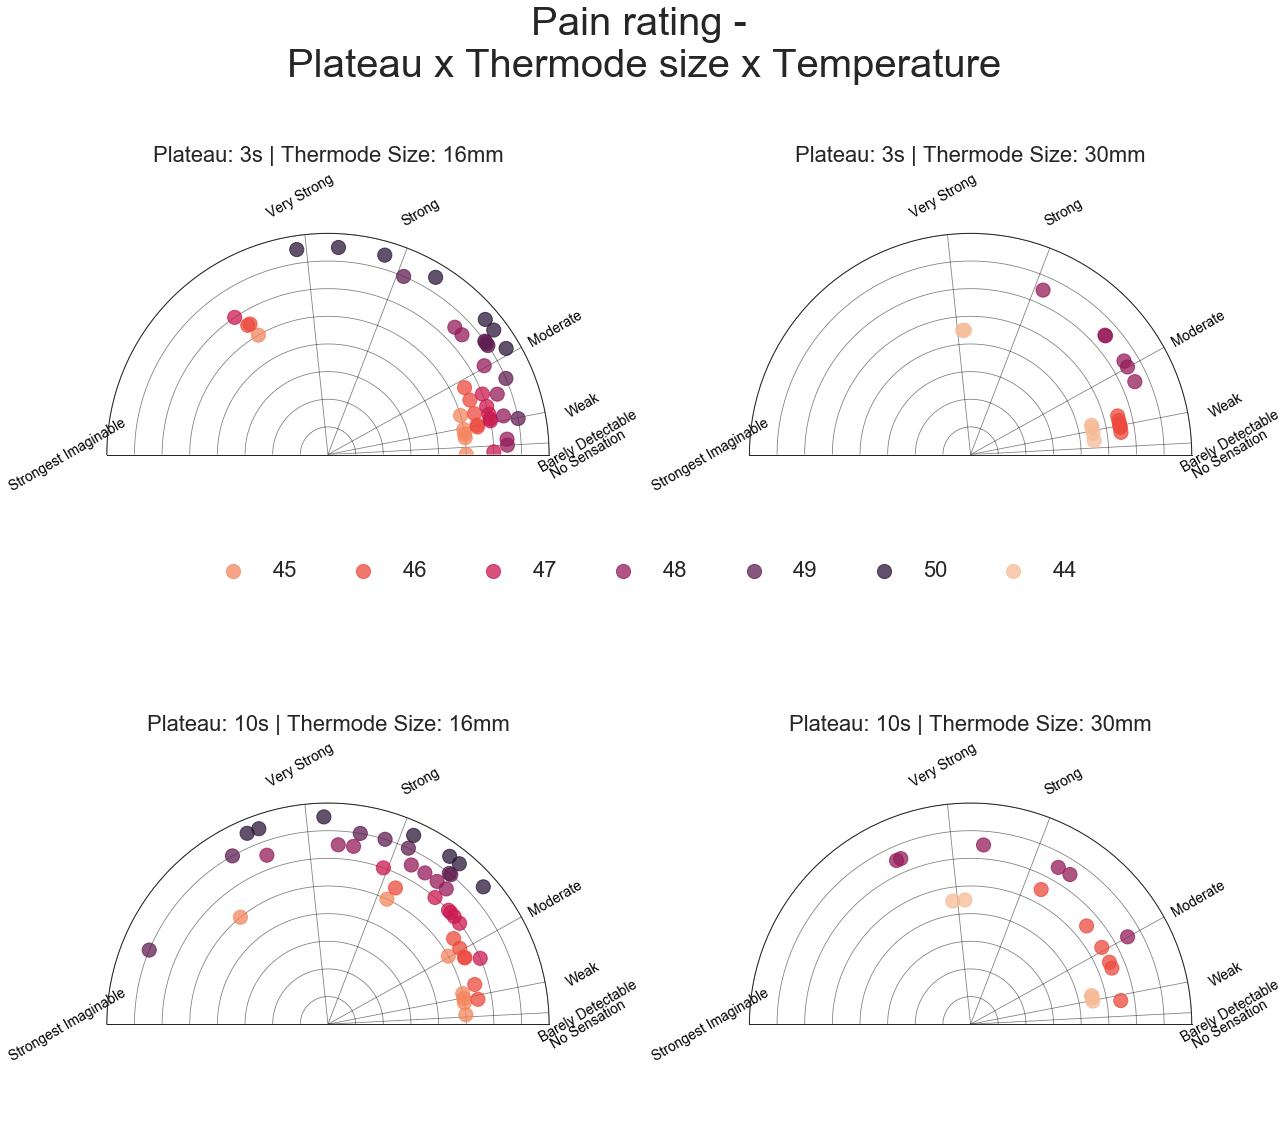

In [15]:
#df = pd.melt(p_result, id_vars=['plateau', 'temperature'], var_name='actual_theta_pi', value_name='actual_theta_pi')
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.set(xmargin=0.05, ymargin=0.15)
    ax.set_thetamin(0);ax.set_thetamax(180)
    my_list = [ 0, 3,  11, 29,69, 96, 180]
    my_new_list = [i * np.pi/180 for i in my_list]
    ax.set_xticks(my_new_list)
    ax.tick_params(direction='out', length=20, width=2, colors='k', pad = 12,
               grid_color='k', grid_alpha=0.5, labelrotation = 30, labelbottom = True)
   
    ax.set_xticklabels(['No Sensation', 
                        'Barely Detectable', 'Weak', 
                        'Moderate', 'Strong', 'Very Strong', 
                        'Strongest Imaginable'])
    ax.title.set_position([.5, 0.9])

c_group_mean = c_rep_resultsult.groupby(['merge_plateau','temperature','thermode_size','src_subject_id']).mean().reset_index()

c_group_mean['newr'] = np.ones(c_group_mean.actual_r.shape)
area = 200 * c_group_mean['newr']**2
c_group_mean.newr = c_group_mean.temperature.replace({44: 0.9, 45: 1, 46:1.1, 47:1.2, 48:1.3, 49:1.4, 50:1.5})
orders = [44,45,46,47,48,49,50]

g = sns.FacetGrid(c_group_mean,  row = "merge_plateau", col = "thermode_size",hue="temperature", palette = "rocket_r", #hue_kws=d,          
                  subplot_kws=dict(projection='polar'), size=9,#hue_order=orders,
                  sharex=False, sharey=False, despine=False)#, margin_titles=True)


g.map(plt.scatter, "actual_theta_pi", "newr", s = area, alpha = 0.75)

    
g.map_dataframe(annotate)

g.set(ylim=(0, 1.6))
g.set(ylabel = None)
g.set(yticklabels=[]) 


g.set_titles(row_template="Plateau: {row_name}s", col_template="Thermode Size: {col_name}mm")

handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='center', ncol=7)
# handles, labels = plt.gca().get_legend_handles_labels()
# order = [7,1,2,3,4,5,6]
# g.fig.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='center', ncol=7)

# handles, labels = g.fig.get_axes().get_legend_handles_labels()
# g.fig.legend(handles=handles, labels=labels, loc='center', ncol=7)
# g.fig.subplots_adjust(top=0.90, bottom=0.10)
# for ax in g.axes.flat:
#     leg = g.axes.flat[0].get_legend()
#     if not leg is None: break
# if leg is None: leg = g._legend
# new_labels = ['44', '45', '46','47', '48', '49', '50']
# for t, l in zip(leg.texts, new_labels): t.set_text(l)

g.fig.suptitle('Pain rating - \nPlateau x Thermode size x Temperature')
g.fig.tight_layout()
plt.show()


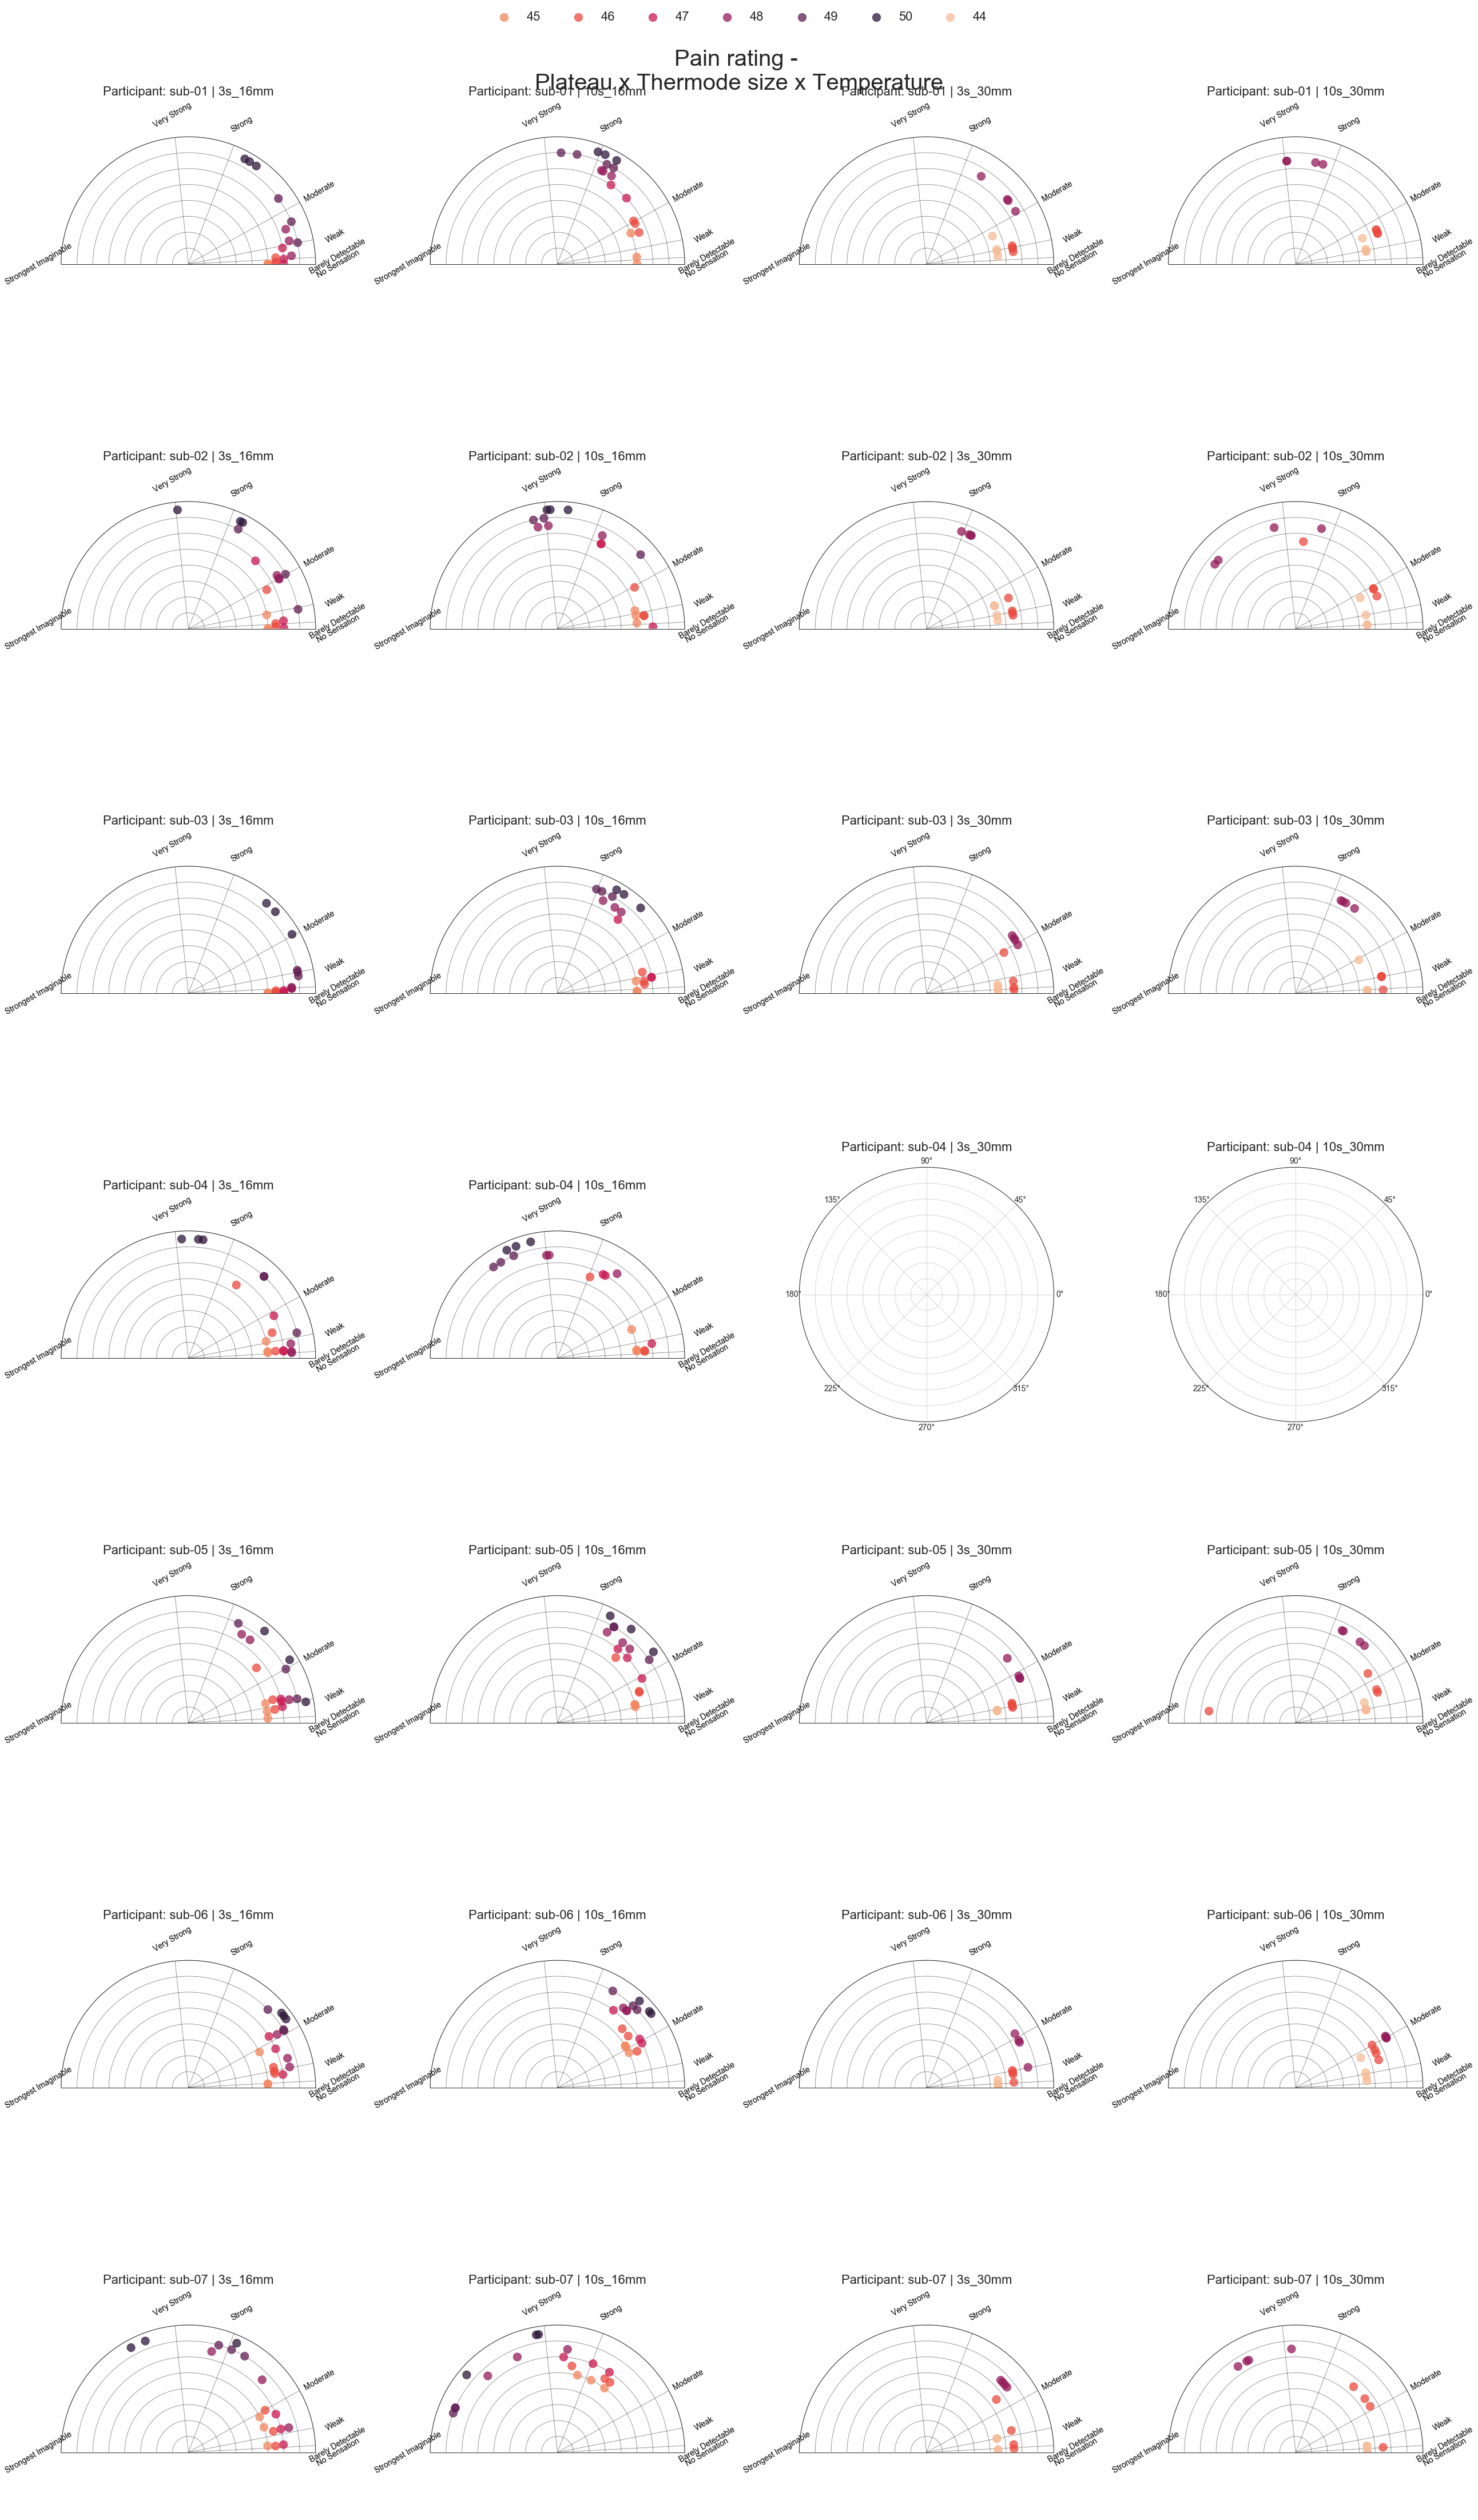

In [44]:
#df = pd.melt(p_result, id_vars=['plateau', 'temperature'], var_name='actual_theta_pi', value_name='actual_theta_pi')
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.set(xmargin=0.05, ymargin=0.15)
    ax.set_thetamin(0);ax.set_thetamax(180)
    my_list = [ 0, 3,  11, 29,69, 96, 180]
    my_new_list = [i * np.pi/180 for i in my_list]
    ax.set_xticks(my_new_list)
    ax.tick_params(direction='out', length=20, width=2, colors='k', pad = 12,
               grid_color='k', grid_alpha=0.5, labelrotation = 30, labelbottom = True)
   
    ax.set_xticklabels(['No Sensation', 
                        'Barely Detectable', 'Weak', 
                        'Moderate', 'Strong', 'Very Strong', 
                        'Strongest Imaginable'])
    ax.title.set_position([.5, 0.9])

cols = ["merge_plateau", "thermode_size"]
c_result['plateau_size']=c_result['merge_plateau'].astype(str)+'s_'+ c_result['thermode_size'].astype(str) + 'mm'

c_result['newr'] = np.ones(c_result.actual_r.shape)
area = 200 * c_result['newr']**2
c_result.newr = c_result.temperature.replace({44: 0.9, 45: 1, 46:1.1, 47:1.2, 48:1.3, 49:1.4, 50:1.5})
orders = [44,45,46,47,48,49,50]



g = sns.FacetGrid(c_result,  row =  "src_subject_id", col = "plateau_size",hue="temperature", palette = "rocket_r", #hue_kws=d,          
                  subplot_kws=dict(projection='polar'), size=9,#hue_order=orders,
                  sharex=False, sharey=False, despine=False)#, margin_titles=True)


g.map(plt.scatter, "actual_theta_pi", "newr", s = area, alpha = 0.75)

    
g.map_dataframe(annotate)

g.set(ylim=(0, 1.6))
g.set(ylabel = None)
g.set(yticklabels=[]) 


g.set_titles(row_template="Participant: sub-0{row_name}", col_template="{col_name}")

handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=7)


g.fig.suptitle('Pain rating - \nPlateau x Thermode size x Temperature')
g.fig.tight_layout()
plt.show()


In [39]:
# p_result['plateau_size'] = str(str(c_result["merge_plateau"]) +"s "+ str(c_result["thermode_size"]) +"mm")

cols = ["merge_plateau", "thermode_size"]
p_result['plateau_size']=p_result['merge_plateau'].astype(str)+'s_'+ p_result['thermode_size'].astype(str) + 'mm'
# p_result['plateau_size'] = c_result[cols].apply(lambda row: 's_'.join(row.values.astype(str)), axis=1)

In [41]:
p_result

,Unnamed: 0,actual_ptb_coord_x,actual_ptb_coord_y,administer,delay_between_medoc,duration,event01_fixation_onset,event02_fixation_onset,event04_fixation_duration,event04_fixation_onset,...,thermode_size,new_actual_coord_x,new_actual_coord_y,actual_r,actual_theta,actual_theta_pi,actual_theta_degree,merge_plateau,newr,plateau_size
0,0,741,587,147,0.060402,8,697560.630898,697563.403705,0,697568.407537,...,16,-219,-120,249.721845,-2.640328,-5.781921,-331.279673,3,1.1,3s_16mm
1,1,999,463,38,0.048676,9,697581.725353,697583.010130,0,697611.013823,...,16,39,-244,247.097147,-1.412301,-4.553894,-260.918882,10,1.5,10s_16mm
2,2,782,532,149,0.052120,8,697625.572650,697626.741507,0,697631.745264,...,16,-178,-175,249.617708,-2.364693,-5.506286,-315.486921,3,1.3,3s_16mm
3,3,863,477,150,0.043343,8,697645.909886,697648.073951,0,697653.077098,...,16,-97,-230,249.617708,-1.969902,-5.111494,-292.867056,3,1.4,3s_16mm
4,4,1003,469,38,0.076656,9,697666.647019,697669.156277,0,697697.161147,...,16,43,-238,241.853261,-1.392052,-4.533645,-259.758721,10,1.5,10s_16mm
5,5,730,631,146,0.055245,8,697711.224629,697714.053123,0,697719.056440,...,16,-230,-76,242.231294,-2.822453,-5.964046,-341.714648,3,1.0,3s_16mm
6,6,859,490,33,0.067962,13,697732.254430,697733.830163,0,697761.833712,...,16,-101,-217,239.353295,-2.006414,-5.148007,-294.959048,10,1.0,10s_16mm
7,7,736,596,146,0.018442,8,697782.578832,697785.417624,0,697790.421225,...,16,-224,-111,249.994000,-2.681523,-5.823116,-333.639942,3,1.0,3s_16mm
8,8,1049,477,151,0.024115,8,697803.802836,697805.565598,0,697810.569266,...,16,89,-230,246.619140,-1.201585,-4.343177,-248.845729,3,1.5,3s_16mm
9,9,904,464,149,0.066137,8,697824.127991,697825.627239,0,697830.630829,...,16,-56,-243,249.369204,-1.797295,-4.938887,-282.977395,3,1.3,3s_16mm


In [ ]:
### tips
https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
    https://kitware.github.io/seaborn_altair/facetgrid.html
https://stackoverflow.com/questions/16085397/changing-labels-in-matplotlib-polar-plot
https://stackoverflow.com/questions/14845350/multiple-x-axis-which-are-nonlinear-to-each-other
    https://seaborn.pydata.org/examples/facet_projections.html
        https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
            https://towardsdatascience.com/seaborn-facetgrid-taking-subplots-further-15ee7af54e44

# load cognitive

In [70]:
sublist = [3,4] 
thermode = ['cognitive'] #, 30]
main_dir = '/Users/h/Documents/projects_local/social_influence_analysis/dartmouth/beh_withcoord'

df = pd.DataFrame()
c_result = pd.DataFrame()

for ind,sub in enumerate(sublist):
    loadfilename =  glob.glob(os.path.join(main_dir ,  'sub-*', 
                                  '*_task-cognitive_meta_beh.csv'))
for file in loadfilename:
    df = pd.read_csv(file)
#     df['src_subject_id'] = sub
    c_result = pd.concat([c_result, df], axis = 0, sort = True)

In [71]:
# step 3 - subtract mid point (psychtoolbox) ________________________________________________________________________

c_result['new_actual_coord_x'] = (c_result['actual_ptb_coord_x'] - origin_x)
c_result['new_actual_coord_y'] = (c_result['actual_ptb_coord_y'] - origin_y)

c_result['actual_r'], c_result['actual_theta'] = cart2pol(c_result['new_actual_coord_x'], c_result['new_actual_coord_y'])
c_result['actual_theta_pi'] = c_result['actual_theta']-np.pi
c_result['actual_theta_degree'] = c_result['actual_theta_pi']*180/np.pi


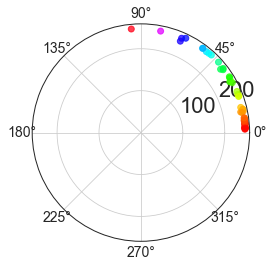

In [72]:
c_actual_filter = c_result.loc[(c_result['actual_r']>=150) & (c_result['event04_actual_responseonset'] != "NA") ]
# Compute areas and colors
c_result = c_actual_filter
colors = c_result['actual_theta_pi']

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(c_result['actual_theta_pi'], c_result['actual_r'], c=colors, cmap='hsv', alpha=0.75)


## cognitive - actual rating - cue

Text(0.5, 0.8, 'Thermode ratings\n on a semi-circular scale')

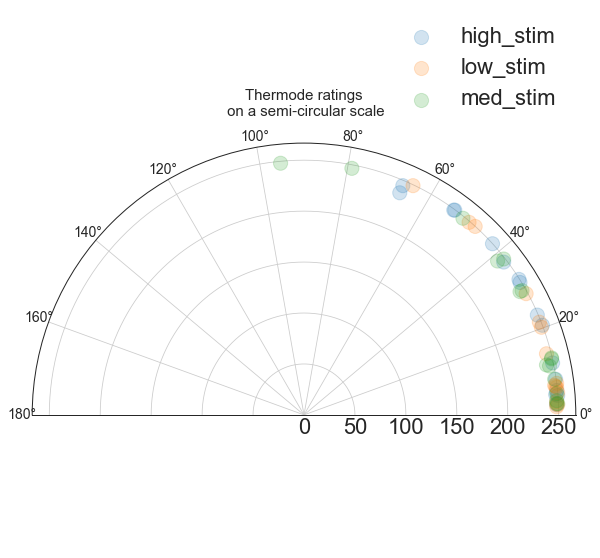

In [73]:


# area = 200 * result['expect_newr']**2
c_result['newr'] = np.ones(c_result.actual_r.shape)
area = 200 * c_result['newr']**2
groups = c_result.groupby('param_stimulus_type')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)

for name, group in groups:
    ax.scatter(group.actual_theta_pi, group.actual_r,label=name, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
ax.legend()

figure_title = "Thermode ratings\n on a semi-circular scale"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)

### plot by rotation degrees

Text(0.5, 0.8, 'Pain task\n rating on semi-circular scale per degree')

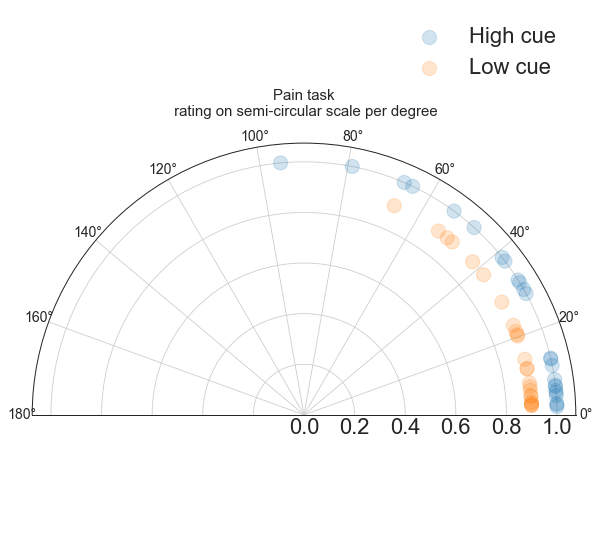

In [74]:
# Compute areas and colors

colors = c_result['actual_theta_pi']
c_result['newr'] = np.ones(c_result.actual_r.shape)

area = 200 * c_result['newr']**2


ca_group_low = c_result.loc[c_result['param_cue_type'] =='low_cue']
ca_group_high = c_result.loc[(c_result['param_cue_type']== 'high_cue')] #| (p_result['param_cue_type']== 10)]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)
p100 = ax.scatter(ca_group_high.actual_theta_pi, np.ones(ca_group_high.actual_r.shape),label='High cue', alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p50 = ax.scatter(ca_group_low.actual_theta_pi, np.ones(ca_group_low.actual_r.shape)*0.9,label='Low cue', alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
figure_title = "Pain task\n rating on semi-circular scale per degree"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)

# participant mean

In [75]:
c_group_mean.loc[c_group_mean['param_cue_type'] =='low_cue']

,param_cue_type,src_subject_id,ISI01_biopac,ISI01_duration,ISI01_onset,ISI02_biopac,ISI02_duration,ISI02_onset,ISI03_biopac,ISI03_duration,...,param_start_biopac,param_trigger_onset,session_id,new_actual_coord_x,new_actual_coord_y,actual_r,actual_theta,actual_theta_pi,actual_theta_degree,newr
2,low_cue,3,1.611771e+09,1.544243,1.611771e+09,1.611771e+09,4.712972,1.611771e+09,1.611771e+09,3.646683,...,1.611771e+09,1.611771e+09,1.0,-121.416667,-192.583333,246.552977,-2.135355,-5.276948,-302.346827,1.0
3,low_cue,4,1.611760e+09,1.504346,1.611760e+09,1.611760e+09,4.110595,1.611760e+09,1.611760e+09,3.130650,...,1.611760e+09,1.611760e+09,1.0,-243.500000,-34.583333,248.273563,-2.999485,-6.141078,-351.857841,1.0


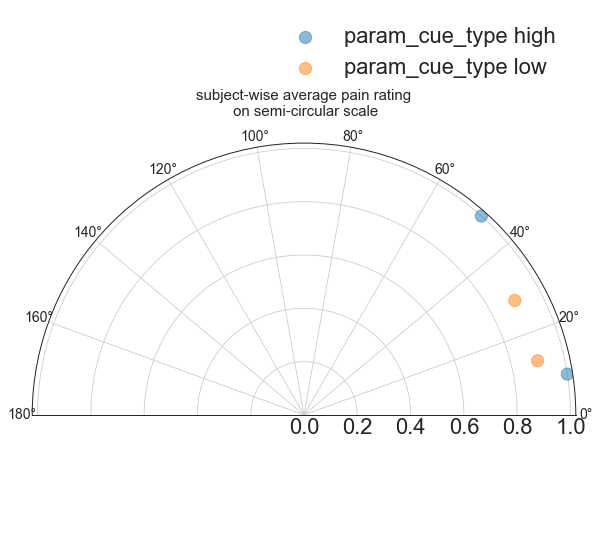

In [76]:
c_group_mean = c_result.groupby(['param_cue_type','src_subject_id']).mean().reset_index()
colors = c_group_mean['actual_theta_pi']
c_group_mean['newr'] = np.ones(c_group_mean.actual_r.shape)
area = 150 * c_group_mean['newr']**2

c_group_mean_low = c_group_mean.loc[c_group_mean['param_cue_type'] =='low_cue']
c_group_mean_high = c_group_mean.loc[(c_group_mean['param_cue_type']== 'high_cue')] 
fig = plt.figure(figsize=(10, 10));ax = fig.add_subplot(projection='polar');ax.set_thetamin(0);ax.set_thetamax(180)
figure_title = "subject-wise average pain rating\n on semi-circular scale"
plt.text(0.5,0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)

chigh = ax.scatter(c_group_mean_high.actual_theta_pi, np.ones(c_group_mean_high.newr.shape),label='param_cue_type high', alpha=0.50, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
clow = ax.scatter(c_group_mean_low.actual_theta_pi, np.ones(c_group_mean_low.newr.shape)*0.9,label='param_cue_type low', alpha=0.50, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 

# p150 = ax.scatter(group_mean_150.theta, np.ones(group_mean_150.newr.shape)*1.1,label=150, alpha=0.60, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
ax.legend()

## cognitive - actual rating - stim

### plot raw form

Text(0.5, 0.8, 'Cognitive task\n rating on semi-circular scale')

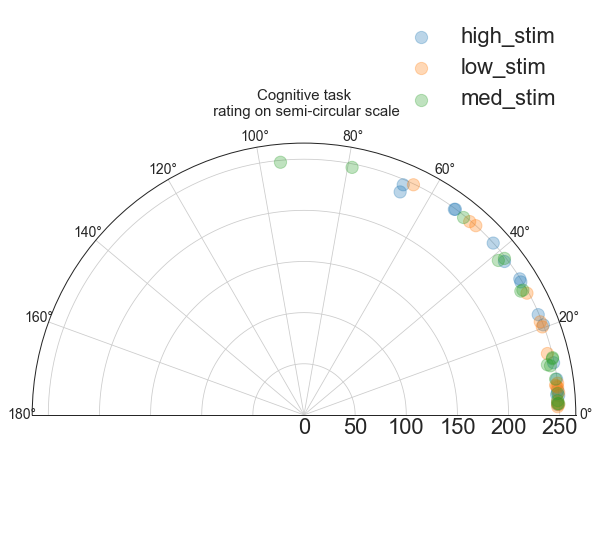

In [77]:
groups = c_result.groupby('param_stimulus_type')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)

for name, group in groups:
    ax.scatter(group.actual_theta_pi, group.actual_r,label=name, alpha=0.30, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
ax.legend()

figure_title = "Cognitive task\n rating on semi-circular scale"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)

### plot by degrees

Text(0.5, 0.8, "all subject's rating on semi-circular scale per celcius")

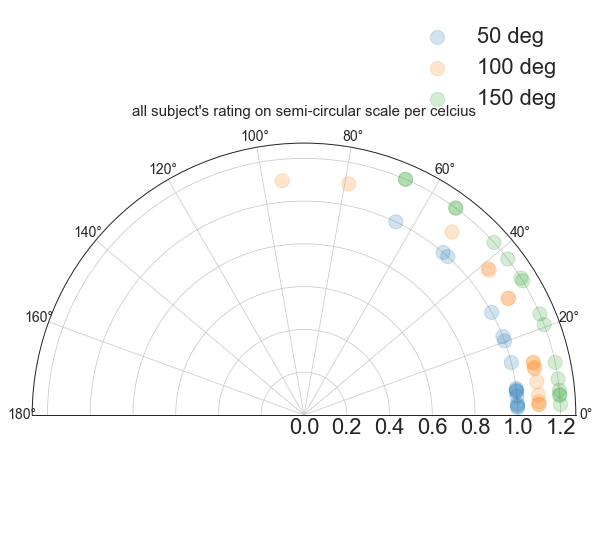

In [83]:
# Compute areas and colors
colors = c_result['actual_theta_pi']
c_result['newr'] = np.ones(c_result.actual_r.shape)

area = 200 * c_result['newr']**2

# groups = c_result.groupby('administer')
group45 = c_result[c_result['param_stimulus_type'] =='low_stim']
group46 = c_result[c_result['param_stimulus_type'] =='med_stim']
group47 = c_result[c_result['param_stimulus_type'] =='high_stim']


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)
p45 = ax.scatter(group45.actual_theta_pi, np.ones(group45.actual_r.shape)*1.0,label='50 deg', alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p46 = ax.scatter(group46.actual_theta_pi, np.ones(group46.actual_r.shape)*1.1,label='100 deg', alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p47 = ax.scatter(group47.actual_theta_pi, np.ones(group47.actual_r.shape)*1.2,label='150 deg', alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
# p48 = ax.scatter(group48.actual_theta_pi, np.ones(group48.actual_r.shape)*1.3,label=48, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
# p49 = ax.scatter(group49.actual_theta_pi, np.ones(group49.actual_r.shape)*1.4,label=49, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
# p50 = ax.scatter(group50.actual_theta_pi, np.ones(group50.actual_r.shape)*1.5,label=50, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
figure_title = "all subject's rating on semi-circular scale per celcius"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)

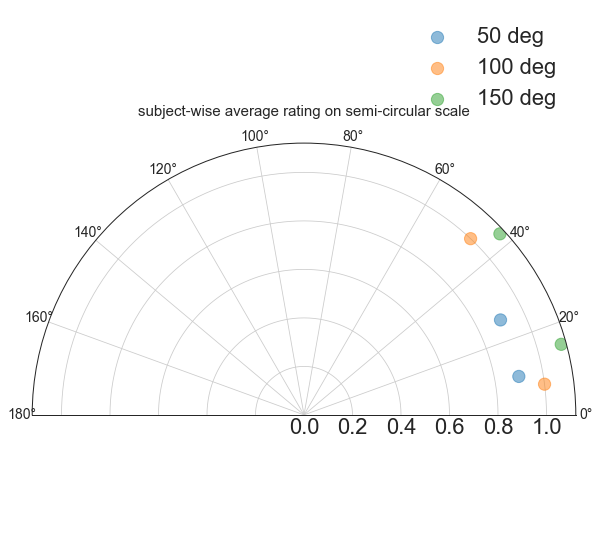

In [85]:
c_group_mean = c_result.groupby(['param_stimulus_type','src_subject_id']).mean().reset_index()
colors = c_group_mean['actual_theta_pi']
c_group_mean['newr'] = np.ones(c_group_mean.actual_r.shape)
# area = 200 * p_result['newr']**2
area = 150 * c_group_mean['newr']**2


# actual_group_mean_50 = c_group_mean[c_group_mean['p5_administer_type'] ==50]
# actual_group_mean_100 = c_group_mean[c_group_mean['p5_administer_type'] ==100]
# actual_group_mean_150 = c_group_mean[c_group_mean['p5_administer_type'] ==150]


group_mean_45 = c_group_mean[c_group_mean['param_stimulus_type'] =='low_stim']
group_mean_46 = c_group_mean[c_group_mean['param_stimulus_type'] =='med_stim']
group_mean_47 = c_group_mean[c_group_mean['param_stimulus_type'] =='high_stim']


fig = plt.figure(figsize=(10, 10));ax = fig.add_subplot(projection='polar');
ax.set_thetamin(0);ax.set_thetamax(180)

figure_title = "subject-wise average rating on semi-circular scale"
plt.text(0.5,0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)

mp45 = ax.scatter(group_mean_45.actual_theta_pi, np.ones(group_mean_45.newr.shape)*0.9,label='50 deg', alpha=0.50, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
mp46 = ax.scatter(group_mean_46.actual_theta_pi, np.ones(group_mean_46.newr.shape)*1.0,label='100 deg', alpha=0.50, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
mp47 = ax.scatter(group_mean_47.actual_theta_pi, np.ones(group_mean_47.newr.shape)*1.1,label='150 deg', alpha=0.50, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
# mp48 = ax.scatter(group_mean_48.actual_theta_pi, np.ones(group_mean_48.newr.shape)*1.2,label=50, alpha=0.50, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
# mp49 = ax.scatter(group_mean_49.actual_theta_pi, np.ones(group_mean_49.newr.shape)*1.3,label=50, alpha=0.50, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
# mp50 = ax.scatter(group_mean_50.actual_theta_pi, np.ones(group_mean_50.newr.shape)*1.4,label=50, alpha=0.50, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 

ax.legend()